In [1]:
import seaborn as sns
import pandas as pd 
import pandasql as ps 
data = pd.read_csv(r'C:\Users\Adam\Desktop\Data_Entry_2017.csv')

data.head(5)

df =  data.groupby('Patient ID').first().reset_index()

df.head(5)


,Patient ID,Image Index,Finding Labels,Follow-up #,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,1,00000001_000.png,Cardiomegaly,0,58,M,PA,2682,2749,0.143,0.143,NaN
1,2,00000002_000.png,No Finding,0,81,M,PA,2500,2048,0.171,0.171,NaN
2,3,00000003_000.png,Hernia,0,81,F,PA,2582,2991,0.143,0.143,NaN
3,4,00000004_000.png,Mass|Nodule,0,82,M,AP,2500,2048,0.168,0.168,NaN
4,5,00000005_000.png,No Finding,0,69,F,PA,2048,2500,0.168,0.168,NaN


Text(0.5, 1.0, 'Age Count of All Patients by Decade')

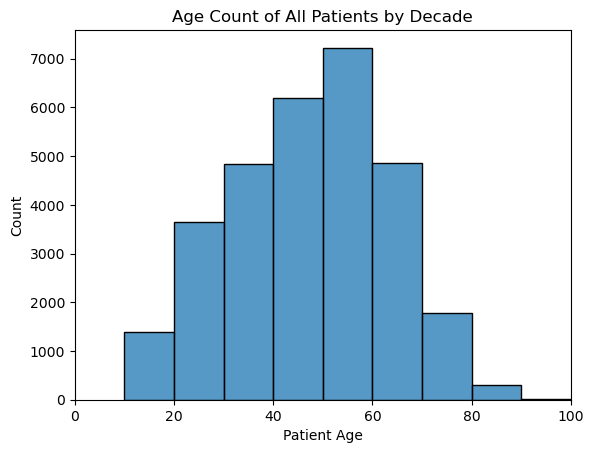

In [2]:

bin_edge = [10,20,30,40,50,60,70,80,90,100,110]
plot = sns.histplot(df['Patient Age'],bins=bin_edge)
plot.set_xlim(0,100)
plot.set_title('Age Count of All Patients by Decade')




# SQL query using pandasql
# query = "SELECT Name, Age FROM data WHERE Age > 30"
# result = ps.sqldf(query, locals())

# print(result)

# plot age and followup together. 


2.639668884921279
46.08776828911907


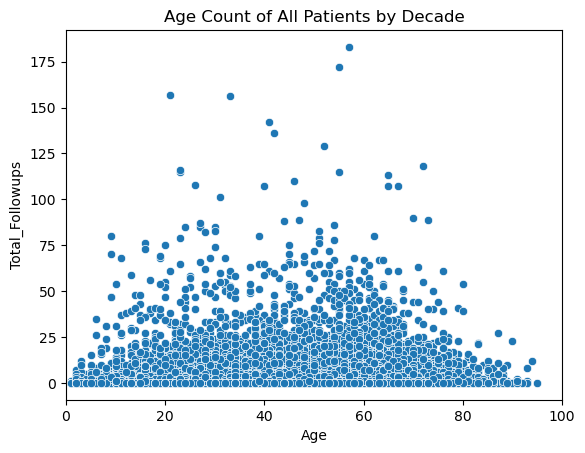

In [3]:

import numpy as np

df2= data.groupby('Patient ID').agg(
    Patient_ID=('Patient ID', 'first'),
    Total_Followups=('Follow-up #', 'last'),
    Age=('Patient Age', 'first')
).reset_index(drop=True)

df2.head(2)

plot_agefollowup = sns.scatterplot(data=df2, x='Age', y='Total_Followups')
plot_agefollowup.set_xlim(0,100)
plot_agefollowup.set_title('Age Count of All Patients by Decade')

z = np.average(df2['Total_Followups'])
print(z) # Average is around 3 followups wholly. 
df_under100 = df2[df2['Age']<100]
z = np.average(df_under100['Age'])
print(z) # Average patient is ~ 46 years old. 

# Considering that most patients are between 40-50 years old, what is the most prevalent disease amongst this group? 



C:\Users\Adam\AppData\Local\Temp\ipykernel_23684\3651783195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4050['disease_primary'] = df_4050['Finding Labels'].str.split('|').str[0]


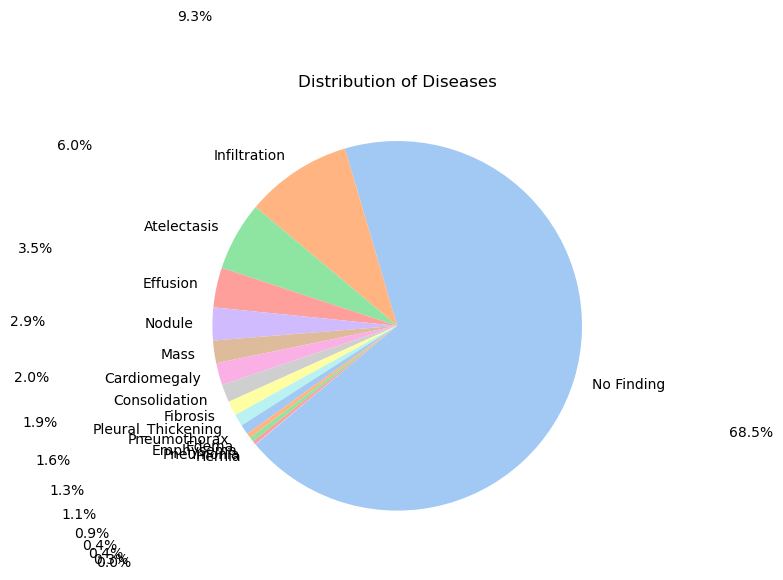

In [4]:
# Considering that most patients are between 40-50 years old, what is the most prevalent disease amongst this group? Utilize the last followup. 
import matplotlib.pyplot as plt
df =  data.groupby('Patient ID').last().reset_index()
df_4050 = df[(df['Patient Age'] >= 40) & (df['Patient Age'] <= 50)]
df_4050['disease_primary'] = df_4050['Finding Labels'].str.split('|').str[0]
disease_counts = df_4050['disease_primary'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Count']
disease_counts.head(10)

plt.figure(figsize=(8, 6))
plt.pie(
    disease_counts['Count'],
    labels=disease_counts['Disease'],
    autopct='%1.1f%%',  # Display percentages
    startangle=220,     # Rotate pie for better angles
    colors=sns.color_palette('pastel'),  # Use Seaborn color palette
    pctdistance= 2
    
)

# Add title
plt.title("Distribution of Diseases")
plt.show()

In [ ]:
# Male, Female
import matplotlib.pyplot as plt
df =  data.groupby('Patient ID').last().reset_index()
disease_counts = df['Patient Gender'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Count']
disease_counts.head(10)



,Disease,Count
0,M,16630
1,F,14175


In [ ]:
# What disease affects each gender more? 
import matplotlib.pyplot as plt
df =  data.groupby('Patient ID').last().reset_index()
df['disease_primary'] = df['Finding Labels'].str.split('|').str[0]
cross_count = pd.crosstab(df['Patient Gender'],df['disease_primary'])
cross_count.head(10)



disease_primary,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Patient Gender,,,,,,,,,,,,,,,
F,892,384,179,70,574,76,194,25,1352,272,9417,404,159,28,149
M,1226,281,263,89,669,159,211,21,1624,393,10935,458,207,41,53


In [14]:
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 35:
        return 'Young Adult'
    elif age < 50:
        return 'Adult'
    elif age < 65:
        return 'Middle-Aged'
    else:
        return 'Senior'
    
df =  data.groupby('Patient ID').last().reset_index()
df['age_group'] = df['Patient Age'].apply(age_group)
groupcount = df['age_group'].value_counts().reset_index()
groupcount.head()

,age_group,count
0,Middle-Aged,10132
1,Adult,8632
2,Young Adult,6399
3,Senior,4149
4,Child,1493


In [13]:
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 35:
        return 'Young Adult'
    elif age < 50:
        return 'Adult'
    elif age < 65:
        return 'Middle-Aged'
    else:
        return 'Senior'

df =  data.groupby('Patient ID').last().reset_index()
df['age_group'] = df['Patient Age'].apply(age_group)
df['disease_primary'] = df['Finding Labels'].str.split('|').str[0]
cross_count = pd.crosstab(df['age_group'],df['disease_primary'])
cross_count.head(10)




disease_primary,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
age_group,,,,,,,,,,,,,,,
Adult,500,164,116,41,280,31,95,3,791,160,6048,231,79,19,74
Child,56,24,32,8,34,3,4,0,174,28,1090,16,11,8,5
Middle-Aged,896,233,143,58,505,89,161,23,1009,268,6153,360,150,25,59
Senior,434,136,80,24,257,97,107,18,358,105,2263,155,83,6,26
Young Adult,232,108,71,28,167,15,38,2,644,104,4798,100,43,11,38


In [ ]:
# View Position information
df =  data
groupcount = df['View Position'].value_counts().reset_index()
groupcount.head()

# 67310 PA
# 44810 AP 

# This is semi balanced. 

,View Position,count
0,PA,67310
1,AP,44810


From what I see here: 

PA, AP images are quite balanced.
Each patient has a variety of number of images. 

Age groups versus disease:


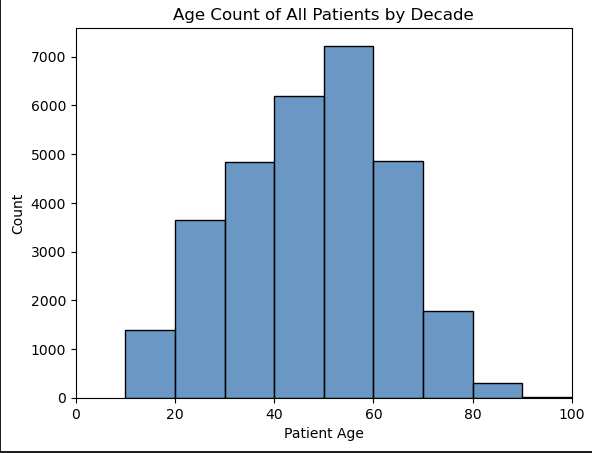

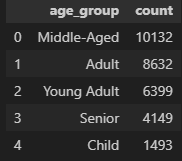

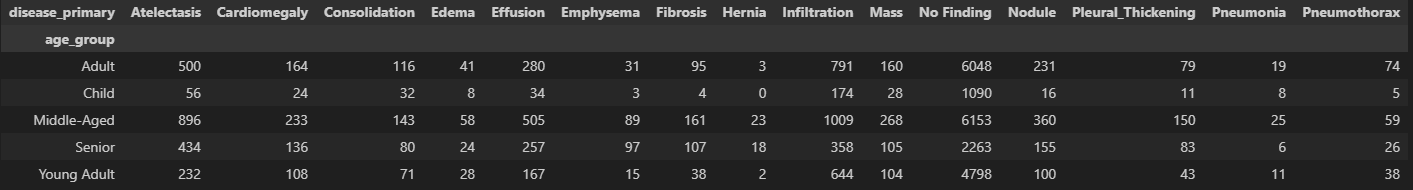


Splitting up by decade: 

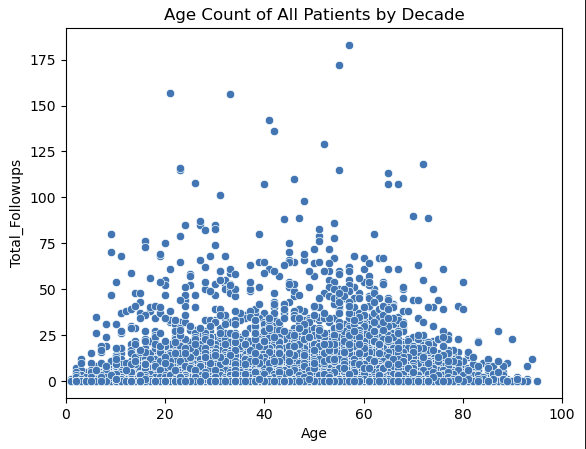

We see that the bunch is between 40, 50 yrs old. 
Average age is 46 yr/o, and average is 3 followups. 

Analyzing the 40-50 y/o's and seeing how they are with disease: 

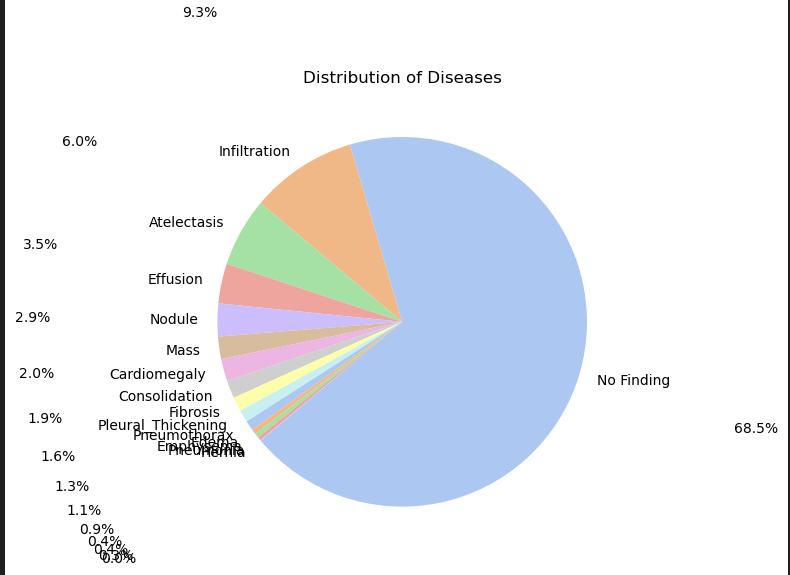

Splitting up M/F: 

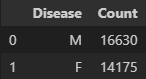

Diseases M/F: 
Infliltration, Effusion, Actletitis
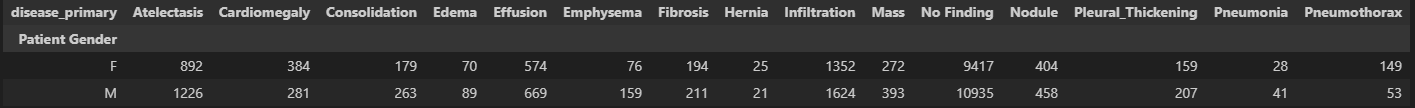



In [20]:
df = data

# Count the number of followups per patient
followup_counts = df.groupby('Patient ID')['Follow-up #'].nunique().reset_index()
followup_counts.columns = ['Patient ID', 'num_followups']
df_with_counts = df.merge(followup_counts, on='Patient ID')
filtered_df = df_with_counts[df_with_counts['num_followups'] >= 5]

filtered_df.head(120)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,num_followups
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,8
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN,8
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN,8
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN,8
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,00000032_038.png,Consolidation|Infiltration,38,32,55,F,AP,2500,2048,0.168,0.168,NaN,61
153,00000032_039.png,Consolidation|Edema,39,32,55,F,AP,2500,2048,0.168,0.168,NaN,61
154,00000032_040.png,Cardiomegaly|Edema,40,32,55,F,AP,2500,2048,0.168,0.168,NaN,61
155,00000032_041.png,Edema|Effusion|Infiltration|Nodule,41,32,55,F,AP,2500,2048,0.168,0.168,NaN,61


In [ ]:
# From what I also see - how do these evolve? These classifications/labels are kind of off........

#Interesting!